Submited by: Sameer Dahal

Task 1: logistic_function + test

In [1]:
import numpy as np

def logistic_function(x):
    """
    Computes the logistic (sigmoid) function applied to any value of x.
    Arguments:
      x: scalar or numpy array
    Returns:
      y: logistic function applied to x
    """
    x = np.array(x)  # works for scalar + arrays
    y = 1 / (1 + np.exp(-x))
    return y

def test_logistic_function():
    # scalar
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # 0.5
    assert round(float(logistic_function(x_scalar)), 3) == expected_output_scalar

    # positive scalar
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # ~0.881
    assert round(float(logistic_function(x_pos)), 3) == expected_output_pos

    # negative scalar
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # ~0.047
    assert round(float(logistic_function(x_neg)), 3) == expected_output_neg

    # array
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array)

    print("All tests passed!")

test_logistic_function()

All tests passed!


Task 2: log_loss + tests

In [2]:
import numpy as np

def log_loss(y_true, y_pred):
    """
    Computes log loss for true label y_true in {0,1} and predicted probability y_pred in [0,1].
    """
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))
    return float(loss)

# quick intuition prints (worksheet style)
y_true, y_pred = 0, 0.1
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

def test_log_loss():
    # perfect prediction y=1,p=1
    y_true, y_pred = 1, 1
    assert np.isclose(log_loss(y_true, y_pred), 0.0)

    # perfect prediction y=0,p=0
    y_true, y_pred = 0, 0
    assert np.isclose(log_loss(y_true, y_pred), 0.0)

    # incorrect prediction checks (worksheet does try/except; clipping avoids crash)
    y_true, y_pred = 1, 0
    _ = log_loss(y_true, y_pred)

    y_true, y_pred = 0, 1
    _ = log_loss(y_true, y_pred)

    # partial
    y_true, y_pred = 1, 0.8
    expected = -(1 * np.log(0.8)) - (0 * np.log(0.2))
    assert np.isclose(log_loss(y_true, y_pred), expected, atol=1e-6)

    y_true, y_pred = 0, 0.2
    expected = -(0 * np.log(0.2)) - (1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected, atol=1e-6)

    print("All tests passed!")

test_log_loss()

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628
All tests passed!


Task 3: cost_function + test

In [3]:
import numpy as np

def cost_function(y_true, y_pred):
    """
    Average log loss across all samples.
    """
    assert len(y_true) == len(y_pred), "Length of true values and predicted values do not match"
    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])
    cost = np.sum(loss_vec) / n
    return float(cost)

def test_cost_function():
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                     -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                     -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

    result = cost_function(y_true, y_pred)
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
    print("Test passed for simple case!")

test_cost_function()

Test passed for simple case!


Task 4: costfunction_logreg (vectorized)

In [4]:
import numpy as np

def costfunction_logreg(X, y, w, b):
    """
    Vectorized cost function for logistic regression parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of X rows and y values do not match."
    assert len(w) == d, "Number of features and w parameters do not match."

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    cost = cost_function(y, y_pred)
    return float(cost)

# test print (worksheet style)
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


Task 5: compute_gradient

In [5]:
import numpy as np

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost w.r.t w and b (batch).
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    error = (y_pred - y)  # shape (n,)
    grad_w = (1 / n) * np.dot(X.T, error)  # shape (d,)
    grad_b = (1 / n) * np.sum(error)       # scalar

    return grad_w, float(grad_b)

# simple test
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

grad_w, grad_b = compute_gradient(X, y, w, b)
print("Gradients computed successfully.")
print(f"grad_w: {grad_w}")
print(f"grad_b: {grad_b}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


Task 6: gradient_descent + test + (optional) plot

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693
All tests passed!


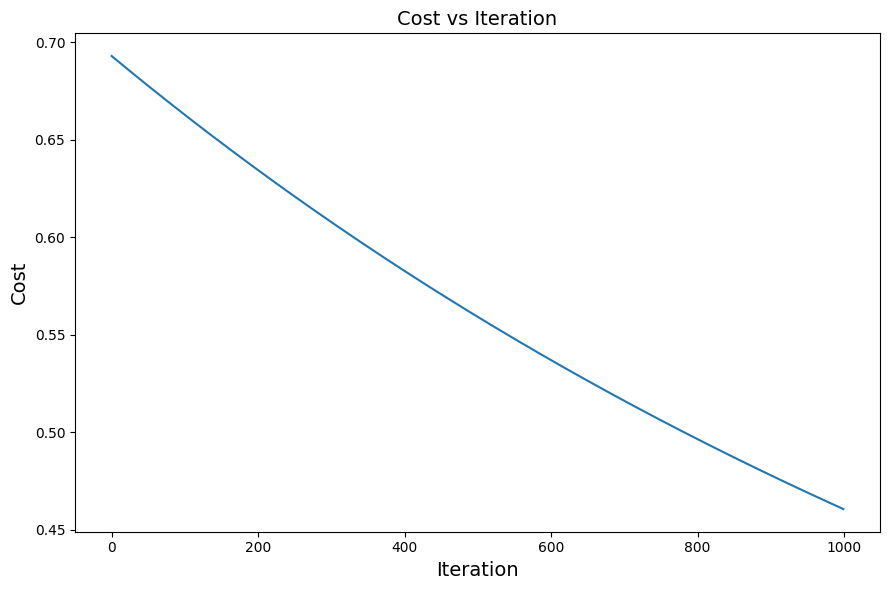

In [6]:
import numpy as np

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Batch gradient descent for logistic regression.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, float(b), cost_history, params_history

# test the function (worksheet style)
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=True, show_params=False
)

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y = np.array([1, 0])
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.1
    n_iter = 100

    w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)

    assert len(cost_history) == n_iter
    assert w_out.shape == w.shape
    assert isinstance(b_out, float)
    assert cost_history[-1] < cost_history[0]
    print("All tests passed!")

test_gradient_descent()

# (optional) plot cost vs iterations
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

Task 7: prediction + test

In [7]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary labels (0/1) using trained w,b.
    """
    z = np.dot(X, w) + b
    y_test_prob = logistic_function(z)
    y_pred = (y_test_prob >= threshold).astype(int)
    return y_pred

def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])
    y_pred = prediction(X_test, w_test, b_test, threshold)

    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

test_prediction()

Test passed!


Task 8: evaluate_classificatio

In [8]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Returns: confusion_matrix, precision, recall, f1_score
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score  = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

    return confusion_matrix, float(precision), float(recall), float(f1_score)

# quick mini test
y_true = np.array([1,0,1,0,1])
y_pred = np.array([1,0,0,0,1])
cm, p, r, f1 = evaluate_classification(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("Precision:", p, "Recall:", r, "F1:", f1)

Confusion Matrix:
 [[2 0]
 [1 2]]
Precision: 1.0 Recall: 0.6666666666666666 F1: 0.8


Putting Helper Function to Action (dataset training)

Load + clean + split + scale (Pima dataset)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
           'DiabetesPedigreeFunction','Age','Outcome']

data_pima_diabetes = pd.read_csv(url, names=columns)

# Replace 0s with NaN in specific columns and fill with median
columns_to_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(numeric_only=True), inplace=True)

data_pima_diabetes.info()
display(data_pima_diabetes.describe())

# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Shapes:", X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Shapes: (614, 8) (154, 8) (614,) (154,)


Train the model


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


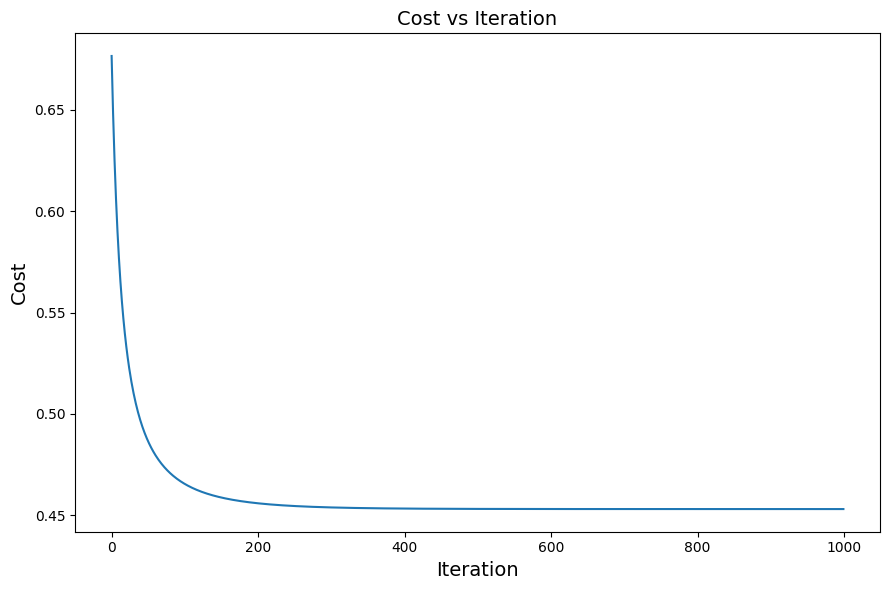

In [10]:
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False
)

plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

Evaluate: train vs test cost + accuracy + confusion matrix

In [11]:
# predictions
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred  = prediction(X_test_scaled,  w, b)

# cost (loss)
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost  = costfunction_logreg(X_test_scaled,  y_test,  w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost):  {test_cost:.4f}")

# overfit/underfit quick interpretation (simple)
gap = test_cost - train_cost
if gap > 0.2:
    print("Finding: looks like overfitting (test loss noticeably higher than train loss).")
elif abs(gap) <= 0.2:
    print("Finding: performance seems acceptable (train and test loss are fairly close).")
else:
    print("Finding: possible underfitting (train loss is high and not better than test).")

# accuracy
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# metrics
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1_score:.2f}")


Train Loss (Cost): 0.4531
Test Loss (Cost):  0.5146
Finding: performance seems acceptable (train and test loss are fairly close).

Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall:    0.50
F1-Score:  0.55


Optional: visualize confusion matrix

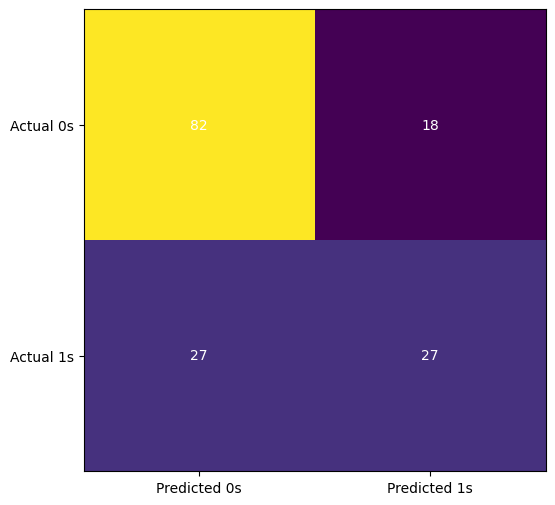

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')

plt.show()